In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

2024-02-12 16:09:19.300945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 16:09:19.301096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 16:09:19.307889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 16:09:19.347211: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-12 16:09:22.404004: W tensorflow/compiler/tf2

preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

/home/nimaasltoghiri/.local/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


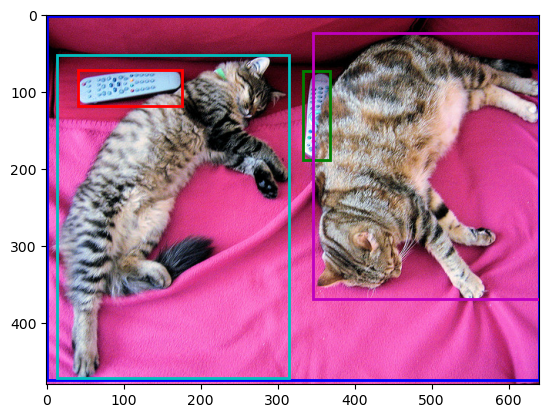

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the list of four points for each rectangle
rectangle_points = [
    [40.16, 70.81, 175.55, 117.98],
    [333.24, 72.55, 368.33, 187.66],
    [-0.02, 1.15, 639.73, 473.76],
    [13.24, 52.05, 314.02, 470.93],
    [345.4, 23.85, 640.37, 368.72]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image (assuming you have loaded the image already)
# Replace 'image' with the variable containing your image data
ax.imshow(image)

# Define colors for each rectangle
colors = ['r', 'g', 'b', 'c', 'm']

# Iterate over the list of rectangle points and colors
for points, color in zip(rectangle_points, colors):
    # Extract the points
    x_min, y_min, x_max, y_max = points

    # Calculate width and height of the rectangle
    width = x_max - x_min
    height = y_max - y_min

    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor=color, facecolor='none')

    # Add the rectangle to the plot
    ax.add_patch(rect)

# Show the plot
plt.show()

In [5]:
image = Image.open("young-man-standing-and-leaning-on-car.jpg")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected car with confidence 0.997 at location [804.27, 564.65, 969.22, 696.28]
Detected cell phone with confidence 0.977 at location [675.33, 519.93, 736.94, 547.49]
Detected person with confidence 1.0 at location [377.54, 140.98, 937.0, 1300.5]
Detected car with confidence 0.996 at location [1.94, 409.84, 753.86, 1221.41]
Detected car with confidence 0.931 at location [606.66, 485.53, 810.87, 729.01]


In [9]:
labels = []
for label in results['labels']:
    labels.append(model.config.id2label[label.item()])

labels 

['car', 'cell phone', 'person', 'car', 'car']

In [21]:
rectangles = []
for box in results['boxes']:
    box = [round(i, 2) for i in box.tolist()]
    rectangles.append(box)

rectangles

[[804.27, 564.65, 969.22, 696.28],
 [675.33, 519.93, 736.94, 547.49],
 [377.54, 140.98, 937.0, 1300.5],
 [1.94, 409.84, 753.86, 1221.41],
 [606.66, 485.53, 810.87, 729.01]]

Set objects name above the objects on image 

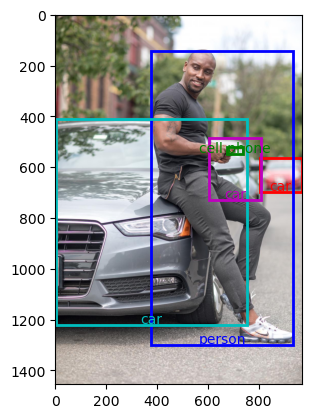

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the list of four points for each rectangle
rectangle_points = rectangles

# Define names for each rectangle
rectangle_names = labels 

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image (assuming you have loaded the image already)
# Replace 'image' with the variable containing your image data
ax.imshow(image)

# Define colors for each rectangle
colors = ['r', 'g', 'b', 'c', 'm']

# Iterate over the list of rectangle points, names, and colors
for points, name, color in zip(rectangle_points, rectangle_names, colors):
    # Extract the points
    x_min, y_min, x_max, y_max = points

    # Calculate width and height of the rectangle
    width = x_max - x_min
    height = y_max - y_min

    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor=color, facecolor='none')

    # Add the rectangle to the plot
    ax.add_patch(rect)

    # Add text label above the rectangle
    ax.text(x_min + width / 2, y_max + 5, name, ha='center', va='bottom', color=color)

# Show the plot
plt.show()


Beautifull‌!!!